In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [42]:
df = pd.read_csv('../data/AGN_K03.csv', dtype={'objID': str, 'DR7ObjID': str, 'specObjID': str})
df.sample(5)

,objID,DR7ObjID,specObjID,ra,dec,z,zErr,velDisp,velDispErr,modelMag_u,...,sfr_tot_p50,nii_6584_flux,nii_6584_flux_err,h_alpha_flux,h_alpha_flux_err,oiii_5007_flux,oiii_5007_flux_err,h_beta_flux,h_beta_flux_err,reliable
243604,1237662534894551295,587736813669646562,1938898660255361024,231.705061,10.894744,0.096246,0.000021,98.32659,7.230129,18.90197,...,0.318169,12.24628,1.420173,18.45080,1.470427,6.276437,1.506411,4.040988,1.390015,1
200486,1237661851483177163,588017605234983113,1522344264695048192,225.988006,37.359183,0.110819,0.000030,233.06770,11.068420,19.62127,...,-0.641169,33.22412,5.137621,44.62609,5.333561,19.749070,4.126788,7.765725,3.466872,1
189858,1237661383314309275,587735662089404586,1610188649754814464,159.089905,39.696786,0.091330,0.000007,110.13140,11.782880,19.34054,...,0.402358,141.98390,3.201506,351.49840,4.593604,18.757480,2.721837,80.386990,2.793853,1
41667,1237651752934047861,587726031709143172,577615272882497536,174.141734,1.751404,0.154745,0.000027,206.56420,12.207070,20.68386,...,-0.840277,25.98487,4.301742,47.63142,3.367343,14.997410,2.904006,11.273300,2.557556,1
225356,1237671762638274713,587746041413369965,378477224585619456,192.302676,-1.863305,-0.000061,0.000013,0.00000,0.000000,21.33428,...,-4.913184,15.50288,8.307707,47.45489,8.737095,16.839290,5.726334,39.791670,6.105803,0


In [69]:
df.objID.duplicated().sum()

5

In [75]:
df[df.objID.duplicated(keep=False)][['objID', 'DR7ObjID', 'specObjID', 'ra', 'dec', 'z', 'bptclass']]

,objID,DR7ObjID,specObjID,ra,dec,z,bptclass
11458,1237649920046661771,587724198821757085,480768912825280512,31.891871,13.564140,0.131869,5
14348,1237649920046661771,587724198821757085,481995142882945024,31.891871,13.564140,0.131788,5
63559,1237655373577847178,587729652352942135,1324069332388440064,255.343110,31.993547,0.031482,1
67320,1237655373577847178,587729652352942135,1095560573443139584,255.343110,31.993547,0.031325,1
68075,1237657591393157322,587731870168252467,1140654573669607424,169.194424,54.751382,0.042351,1
69238,1237657857680081097,587732136455176326,987571762818476032,166.659026,51.829062,0.109769,1
102375,1237657857680081097,587732136455176326,988635265440442368,166.659026,51.829062,0.109966,1
126386,1237661435926413321,588298664654929926,1650735616289171456,209.786970,46.020682,0.055577,1
126627,1237657591393157322,587731870168252467,1139554236435032064,169.194424,54.751382,0.041917,3
202305,1237661435926413321,588298664654929926,1446804790599247872,209.786970,46.020682,0.055636,1


In [72]:
df.DR7ObjID.duplicated().sum()

5

In [70]:
df.specObjID.duplicated().sum()

0

# Summary statistics

In [28]:
bpt_class_dict = {
    1:'Star Forming', 
    2:'Low S/N Star Forming',
    3:'Composite', 
    4:'AGN', 
    5:'Low S/N AGN', 
    -1:'Unclassifiable'
}

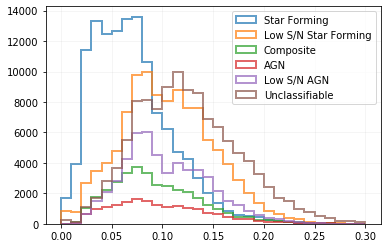

In [29]:
for c, label in  bpt_class_dict.items():
    plt.hist(df[df.bptclass == c].z, bins=30, range=[0, 0.3], label=label, alpha=0.7, histtype='step', lw=2);
plt.legend()
plt.grid(alpha=0.15)

In [8]:
df.columns

Index(['objID', 'DR7ObjID', 'specObjID', 'ra', 'dec', 'z', 'zErr', 'velDisp',
       'velDispErr', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z', 'petroMag_r', 'petroR50_r', 'petroR90_r', 'bptclass',
       'oh_p50', 'lgm_tot_p50', 'sfr_tot_p50', 'nii_6584_flux',
       'nii_6584_flux_err', 'h_alpha_flux', 'h_alpha_flux_err',
       'oiii_5007_flux', 'oiii_5007_flux_err', 'h_beta_flux',
       'h_beta_flux_err', 'reliable'],
      dtype='object')

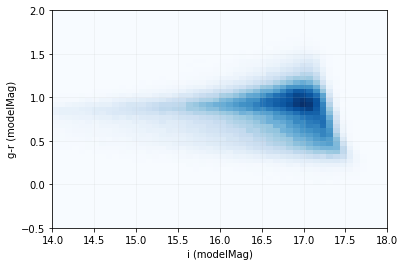

In [20]:
plt.hist2d(df.modelMag_i, df.modelMag_g - df.modelMag_r, range=[(14, 18), (-0.5, 2)], bins=[50, 50], cmap='Blues');
plt.xlabel('i (modelMag)')
plt.ylabel('g-r (modelMag)')
plt.grid(alpha=0.15)

In [33]:
# anything with 0 error?
((df.h_alpha_flux_err <= 0) | (df.oiii_5007_flux_err <= 0) | (df.nii_6584_flux_err <= 0) | (df.h_beta_flux_err <= 0)).sum()

0

In [35]:
# get SNR > 3
high_snr = (
    (df.h_alpha_flux / df.h_alpha_flux_err >= 3) & 
    (df.nii_6584_flux / df.nii_6584_flux_err >= 3) & 
    (df.oiii_5007_flux / df.oiii_5007_flux_err >= 3) & 
    (df.h_beta_flux / df.h_beta_flux_err >= 3)    
)

sum(high_snr)

259490

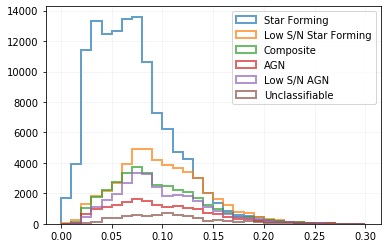

In [36]:
for c, label in  bpt_class_dict.items():
    plt.hist(df[high_snr & (df.bptclass == c)].z, bins=30, range=[0, 0.3], label=label, alpha=0.7, histtype='step', lw=2);
plt.legend()
plt.grid(alpha=0.15)

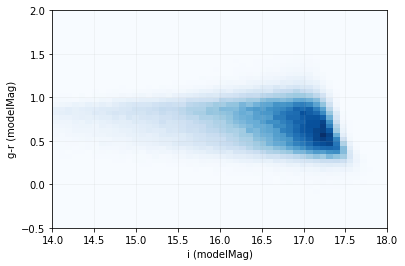

In [37]:
plt.hist2d(
    df[high_snr].modelMag_i, 
    (df.modelMag_g - df.modelMag_r)[high_snr], 
    range=[(14, 18), (-0.5, 2)], 
    bins=[50, 50], 
    cmap='Blues'
)
plt.xlabel('i (modelMag)')
plt.ylabel('g-r (modelMag)')
plt.grid(alpha=0.15)

# Line ratios

In [43]:
df = df[high_snr].copy()

In [44]:
df['log_nii_halpha'] = np.log10(df.nii_6584_flux / df.h_alpha_flux)
df['log_oiii_hbeta'] = np.log10(df.oiii_5007_flux / df.h_beta_flux)

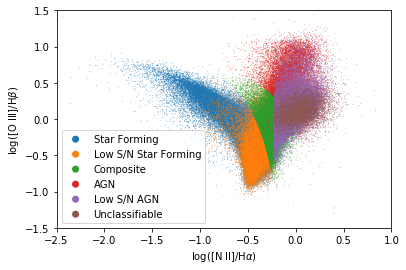

In [55]:
for c, label in  bpt_class_dict.items():

    plt.scatter(
        df[df.bptclass == c].log_nii_halpha,
        df[df.bptclass == c].log_oiii_hbeta,
        s=0.5,
        edgecolor='none',
        label=label,
    )
    
plt.xlim(-2.5, 1)
plt.ylim(-1.5, 1.5)

plt.xlabel(r'log([N II]/H$\alpha$)')
plt.ylabel(r'log([O III]/H$\beta$)')
plt.legend(markerscale=10);

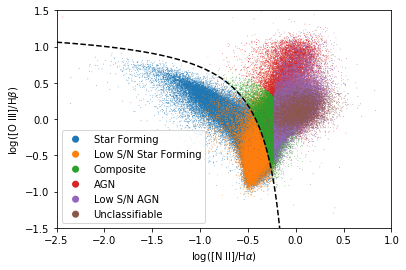

In [59]:

for c, label in  bpt_class_dict.items():

    plt.scatter(
        df[df.bptclass == c].log_nii_halpha,
        df[df.bptclass == c].log_oiii_hbeta,
        s=0.5,
        edgecolor='none',
        label=label,
    )
    


# Kauffmann et al. (2003) dividing line
x = np.arange(-2.5, 0.06, 0.02)
y = 0.61 / (x - 0.05) + 1.3 

plt.plot(x, y, c='k', ls='--')

plt.xlim(-2.5, 1)
plt.ylim(-1.5, 1.5)

plt.xlabel(r'log([N II]/H$\alpha$)')
plt.ylabel(r'log([O III]/H$\beta$)')
plt.legend(markerscale=10);

# Some subsamples

In [63]:
df = df[(df.reliable == 1)]
df.shape

(256505, 32)

In [64]:
df.bptclass.value_counts()

 1    124262
 2     47905
 3     33347
 5     28092
 4     16220
-1      6679
Name: bptclass, dtype: int64

In [67]:
from IPython.display import display

In [68]:
for c, label in bpt_class_dict.items(): 
    display(label)
    display(df[df.bptclass == c][['ra', 'dec']].sample(20))

'Star Forming'

,ra,dec
4132,157.178188,-0.144494
344072,155.906794,22.334389
257342,204.726513,6.040725
188367,252.271951,29.758780
119487,155.390894,46.885611
240944,229.092668,33.534650
108250,144.571703,42.973145
93736,155.548026,48.266050
306096,243.198349,28.868318
123448,174.233846,55.533703


'Low S/N Star Forming'

,ra,dec
301146,153.022061,26.190450
229516,235.765639,8.170228
52555,339.403767,13.106257
50845,56.088686,-5.418145
233856,218.706425,38.881418
256443,240.764792,27.041749
87064,215.116577,6.694517
289602,235.294345,13.473086
25276,246.538193,48.734485
413976,119.108411,15.255034


'Composite'

,ra,dec
55678,144.042890,1.795917
406150,182.051095,33.059919
100140,134.530997,44.667129
424009,212.740353,18.177834
409083,132.468973,10.545502
178868,227.231446,41.548096
384558,151.877373,15.014259
354097,190.696658,27.271927
7038,176.982935,-3.150882
414687,222.290299,29.990076


'AGN'

,ra,dec
291702,139.160985,62.755809
48436,5.722057,-8.999051
116634,169.685817,3.702057
430421,197.858601,22.012121
46964,213.688678,1.833402
408992,167.687603,25.133877
436531,237.867252,14.249539
30575,236.431145,53.507301
380387,168.916338,26.911668
213088,165.915711,40.157503


'Low S/N AGN'

,ra,dec
123222,141.572304,41.481459
308689,148.384741,33.921852
355434,237.065420,14.892471
332781,192.874247,38.789628
410343,205.966182,29.456023
200680,185.023432,44.992770
70434,234.677857,57.608731
23907,120.780039,40.279467
156986,206.587355,38.851404
184598,228.308272,47.102317


'Unclassifiable'

,ra,dec
74955,153.651008,57.086426
272352,228.375675,35.570294
388703,223.248619,17.365174
368012,159.639213,28.720090
377715,173.177792,17.107785
371230,152.989012,23.815914
20751,260.965406,55.241680
243868,243.529978,50.269705
320408,222.885244,23.936341
155174,144.611044,6.382135


# Save cleaned catalog

In [85]:
df = pd.read_csv('../data/AGN_K03.csv', dtype={'objID': str, 'DR7ObjID': str, 'specObjID': str})
df.shape

(452334, 30)

In [86]:
nonduplicated = ~df.objID.duplicated(keep=False)

high_snr = (
    (df.h_alpha_flux / df.h_alpha_flux_err >= 3) & 
    (df.nii_6584_flux / df.nii_6584_flux_err >= 3) & 
    (df.oiii_5007_flux / df.oiii_5007_flux_err >= 3) & 
    (df.h_beta_flux / df.h_beta_flux_err >= 3)    
)

reliable = df.reliable == 1

higher_z = (df.z > 0.02) & (df.zErr < 0.01)

sum(nonduplicated), sum(high_snr), sum(reliable), sum(higher_z)

(452320, 259490, 448078, 443705)

In [87]:
sum(nonduplicated & high_snr & reliable & higher_z)

250224

In [88]:
df[nonduplicated & high_snr & reliable & higher_z].to_csv('../data/agn_cleaned.csv', index=False)

In [89]:
for c, label in bpt_class_dict.items(): 
    display(label)
    display(df[df.bptclass == c][['ra', 'dec']].sample(20))

'Star Forming'

,ra,dec
121744,246.416487,43.526048
81713,202.452080,-3.086454
16872,11.432048,15.374445
179032,182.894151,14.249261
55175,216.018345,4.169777
160501,228.185644,40.109902
59863,125.322772,44.056153
56717,140.086904,55.211362
60718,170.812420,63.656241
302172,195.411214,38.549587


'Low S/N Star Forming'

,ra,dec
166146,159.316550,39.324065
313027,136.260501,13.620757
348288,177.910327,24.975309
440549,174.251559,22.325393
368158,247.239566,12.974342
340993,181.251012,32.331168
174444,166.711138,14.456510
123080,195.142678,50.288316
156794,211.459412,58.494024
265867,216.806937,43.171908


'Composite'

,ra,dec
224336,174.859156,6.173859
305806,161.468801,30.856060
130353,155.224349,52.477210
391447,148.373777,21.351248
230406,200.815927,13.139783
437880,160.373042,16.856320
126231,164.777908,57.482213
173943,144.757579,8.804693
72635,128.717114,44.637127
349816,228.823102,17.437152


'AGN'

,ra,dec
323172,209.009943,23.291668
251047,237.688337,28.350059
24177,140.201382,1.044529
35805,171.931482,67.102051
248483,229.427042,6.512901
400175,181.580967,36.193360
231803,187.647516,42.965440
125561,127.300716,35.079290
234665,185.926592,13.833641
400586,174.233369,19.201537


'Low S/N AGN'

,ra,dec
250195,157.350219,35.986898
304647,183.953644,15.683258
258820,241.253441,28.142857
187105,198.478945,6.845937
70560,126.683206,3.399142
19534,147.288207,58.260601
98449,211.159106,5.218464
124409,134.197139,43.268956
241693,245.323445,24.441721
358646,170.042449,19.857885


'Unclassifiable'

,ra,dec
276537,216.526771,12.547480
131005,174.281344,57.432651
448857,236.713252,1.750638
133031,334.690946,-9.328747
23059,327.735437,-7.891967
105302,116.894504,23.270368
255206,233.883962,23.056659
408458,229.313573,22.131754
265166,234.774564,27.998656
188819,247.068037,35.605252
